# Avaliando o desempenho de uma Random Forest para o conjunto de dados SysFall

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import os
from sklearn.svm import SVC
import seaborn as sns
import tensorflow
import emlearn

### Avaliando o desempenho do modelo para Random Forest sem feature extraction

In [4]:
#Ler o novo dataset sem as features
dataset = pd.read_csv('/Volumes/T7 Shield/TCC/elderly_fall_detection/dataset.csv')

# Separa os recursos (X) e o rótulo (y)
X = dataset.iloc[:, :-1] # Todos os dados, exceto o último (que é o rótulo)
y = dataset.iloc[:, -1]   # Última coluna como rótulo

# Divide o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X_train)

             acc_x     acc_y     acc_z     gir_x     gir_y     gir_z
2877611   0.519170  0.494993  0.454623  0.507254  0.513574  0.508275
5530140   0.501099  0.504275  0.506779  0.510358  0.461801  0.495584
1804004   0.501954  0.469712  0.496152  0.496312  0.495081  0.487383
14993838  0.497680  0.465681  0.501649  0.494529  0.527212  0.538964
14538496  0.500488  0.474597  0.487847  0.498048  0.492239  0.480073
...            ...       ...       ...       ...       ...       ...
10081351  0.496825  0.468735  0.500061  0.497664  0.497509  0.487903
6550634   0.508059  0.478139  0.516917  0.496558  0.494954  0.488348
6423388   0.497192  0.502320  0.465250  0.495697  0.495273  0.487791
15351219  0.532357  0.504641  0.495053  0.495666  0.495241  0.487903
14802022  0.501832  0.449438  0.479907  0.526464  0.503066  0.477364

[11101250 rows x 6 columns]


In [7]:
print(y_train)

2877611     0
5530140     0
1804004     0
14993838    1
14538496    0
           ..
10081351    0
6550634     0
6423388     1
15351219    1
14802022    0
Name: queda, Length: 11101250, dtype: int64


#### Testando com 5 árvores

In [9]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=5, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [10]:
#Salva o modelo
joblib.dump(model_rf, 'model_rf_5tree_sem_feature.pkl')

['model_rf_5tree_sem_feature.pkl']

Acurácia: 0.87
Precisão: 0.86
Recall: 0.75
F1-Score: 0.80


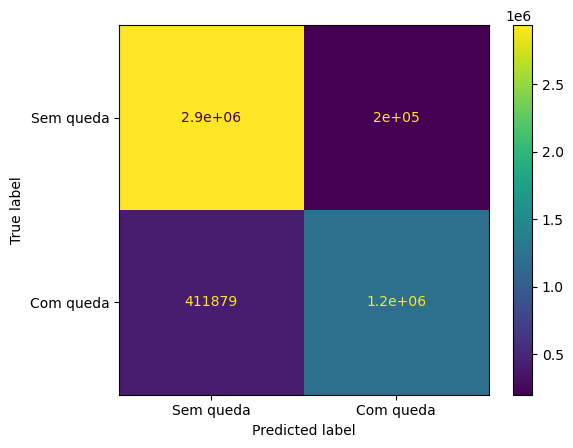

In [8]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_5trees_sem_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Testando com 10 árvores

In [3]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [4]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_10trees_sem_feature.pkl')

['model_rf_10trees_sem_feature.pkl']

Acurácia: 0.88
Precisão: 0.92
Recall: 0.72
F1-Score: 0.81


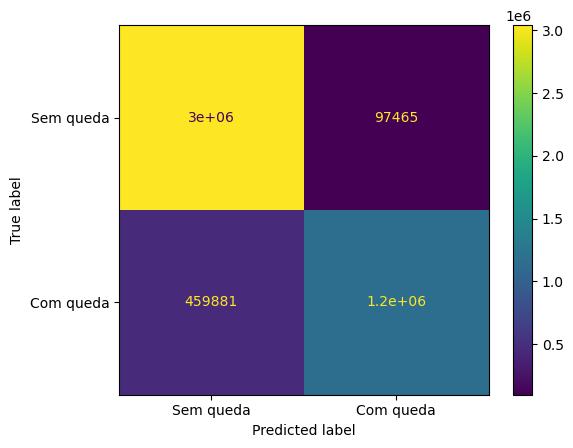

In [5]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_10trees_sem_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Testando com 50 árvores

In [ ]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_50trees_sem_feature.pkl')

['model_rf_50trees_sem_feature.pkl']

Acurácia: 0.89
Precisão: 0.94
Recall: 0.74
F1-Score: 0.83


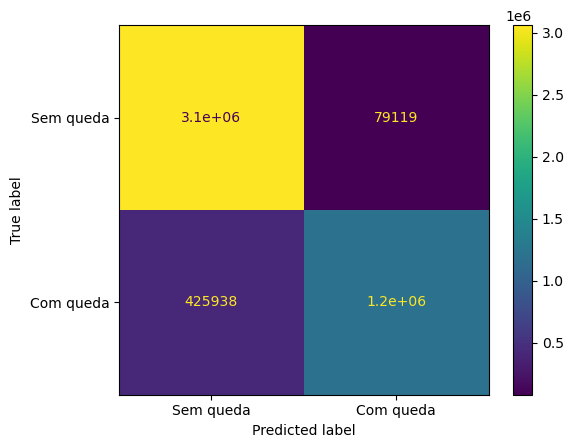

In [3]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_50trees_sem_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

### Avaliando o desempenho do modelo com feature extraction

In [6]:
#Ler o novo dataset com as features
dataset_com_features = pd.read_csv('dataset_com_feature.csv')
dataset = pd.read_csv('dataset.csv')

# Separa os recursos (X) e o rótulo (y)
X = dataset_com_features.iloc[:, :-1] # Todos os dados, exceto o último (que é o rótulo)
y = dataset.iloc[:, -1]   # Última coluna como rótulo

# Divide o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Testando com 5 árvores

In [7]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=5, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [8]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_5trees_com_feature.pkl')

['model_rf_5trees_com_feature.pkl']

Acurácia: 0.87
Precisão: 0.85
Recall: 0.74
F1-Score: 0.79


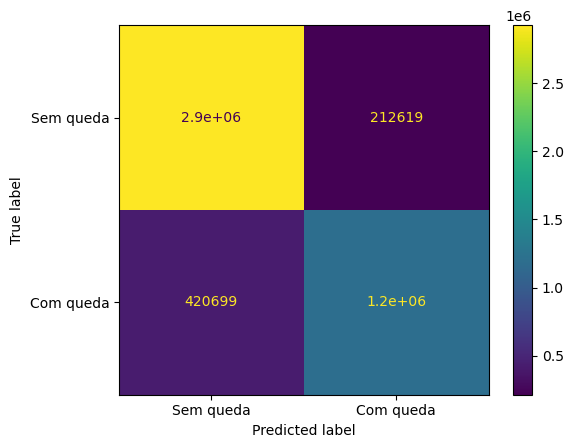

In [9]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_5trees_com_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Testando com 10 árvores

In [6]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=10, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [7]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_10trees_com_feature.pkl')

['model_rf_10trees_com_feature.pkl']

Acurácia: 0.88
Precisão: 0.91
Recall: 0.71
F1-Score: 0.80


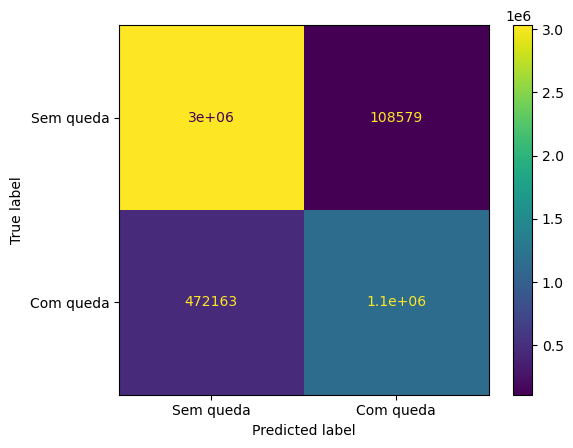

In [4]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_10trees_com_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

##### Testando com 50 árvores

In [9]:
# Treinando o modelo para random forest classifier
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [10]:
# Salvar o modelo treinado
joblib.dump(model_rf, 'model_rf_50trees_com_feature.pkl')

['model_rf_50trees_com_feature.pkl']

Acurácia: 0.89
Precisão: 0.93
Recall: 0.73
F1-Score: 0.82


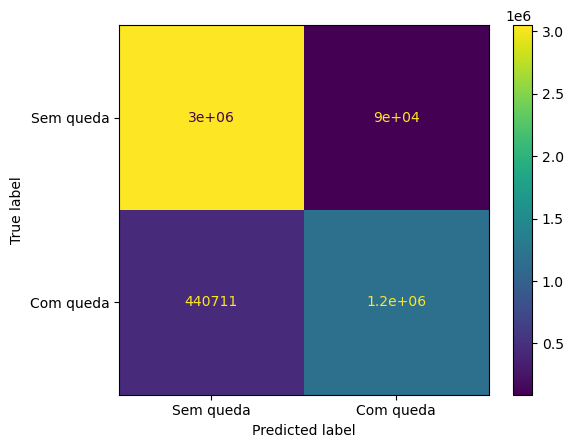

In [3]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_rf_50trees_com_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Resumo do desempenho dos modelos

In [10]:
# Imprime as metricas obtidas para cada modelos em forma de tabela

data = {'Modelo': ['RF 5 trees without feat.', 'RF 10 trees without feat.', 'RF 50 trees without feat.', 'RF 5 trees with feat.', 'RF 10 trees with feat.', 'RF 50 trees with feat.'],
        'Acurácia': [0.87, 0.88, 0.89, 0.85, 0.88, 0.89],
        'Precisão': [0.86, 0.92, 0.94, 0.85, 0.91, 0.93],
        'Recall': [0.75, 0.72, 0.74, 0.74, 0.71, 0.73],
        'F1-Score': [0.80, 0.81, 0.83, 0.79, 0.80, 0.82]}
df = pd.DataFrame(data)

# Imprime o DataFrame
print(df)


                      Modelo  Acurácia  Precisão  Recall  F1-Score
0   RF 5 trees without feat.      0.87      0.86    0.75      0.80
1  RF 10 trees without feat.      0.88      0.92    0.72      0.81
2  RF 50 trees without feat.      0.89      0.94    0.74      0.83
3      RF 5 trees with feat.      0.85      0.85    0.74      0.79
4     RF 10 trees with feat.      0.88      0.91    0.71      0.80
5     RF 50 trees with feat.      0.89      0.93    0.73      0.82


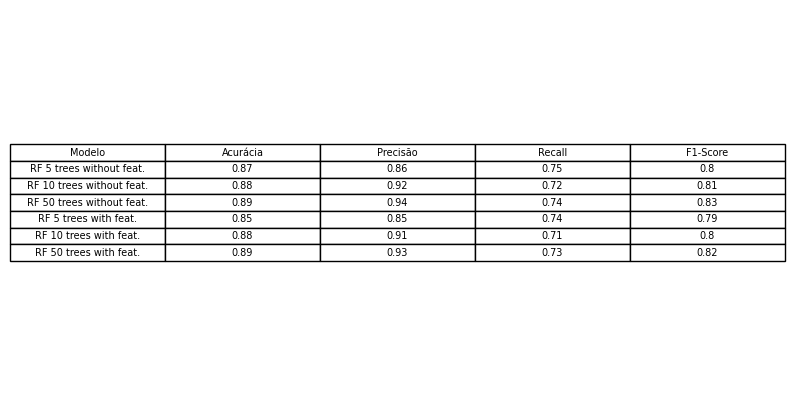

In [11]:
# Tabela de metricas
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')
plt.savefig('tabela_metricas.png', bbox_inches='tight')
plt.show()


#### Salvando os coeficientes do modelo escolhido

In [12]:
# Carrega o modelo escolhido
model_rf = joblib.load('model_rf_5trees_sem_feature.pkl')

# Salva os coeficientes do modelo em um arquivo
np.savetxt('coeficientes.csv', model_rf.feature_importances_, delimiter=',')

# Carrega os coeficientes do arquivo
coeficientes = np.loadtxt('coeficientes.csv', delimiter=',')
print(coeficientes)

[0.15877405 0.25438757 0.17868511 0.14560382 0.13798382 0.12456563]


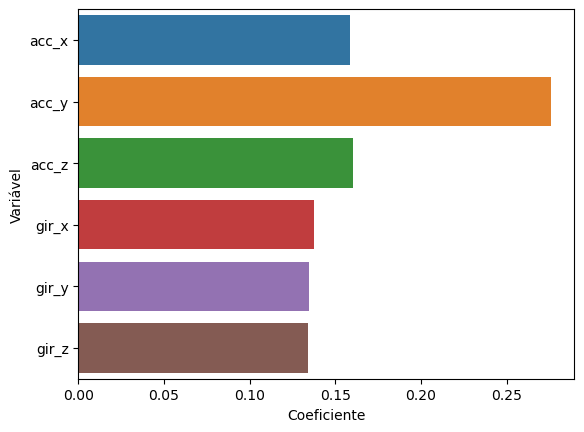

In [13]:
# Cria um DataFrame com os coeficientes
df_coef = pd.DataFrame({'Variável': dataset.columns[:-1], 'Coeficiente': coeficientes})

# Exibe o DataFrame
sns.barplot(x='Coeficiente', y='Variável', data=df_coef)

# Salva o gráfico como imagem
plt.savefig('graficocoeficientes.png', bbox_inches='tight')

# Mostra o gráfico
plt.show()


##### Testando uma Decision Tree

In [6]:
#Implementando uma decision tree
from sklearn.tree import DecisionTreeClassifier

# Treinando o modelo para decision tree classifier 
model_dt = DecisionTreeClassifier(random_state=42,max_depth=10)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [7]:
#Salvar o modelo treinado
joblib.dump(model_dt, 'model_dt_sem_feature.pkl')

['model_dt_sem_feature.pkl']

Acurácia: 0.81
Precisão: 0.85
Recall: 0.53
F1-Score: 0.65


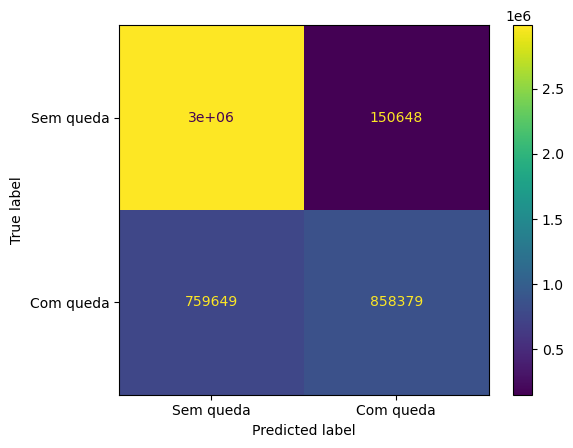

In [8]:
# Testando o modelo a partir do modelo salvo
model_rf = joblib.load('model_dt_sem_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Acurácia: {accuracy_rf:.2f}')

precision_rf = precision_score(y_test, y_pred_rf)
print(f'Precisão: {precision_rf:.2f}')

recall_rf = recall_score(y_test, y_pred_rf)
print(f'Recall: {recall_rf:.2f}')

f1_rf = f1_score(y_test, y_pred_rf)
print(f'F1-Score: {f1_rf:.2f}')

# Plotar a matriz de confusão de forma formatada
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Sem queda', 'Com queda'])
disp.plot()
plt.show()

#### Comparando desenpenho Random Forest de 5 árvores x Decision Tree

                  Modelo  Acurácia  Precisão    Recall  F1-Score
0  Random Forest 5 trees  0.871441  0.857911  0.745444  0.797733
1          Decision Tree  0.340088  0.340088  1.000000  0.507560


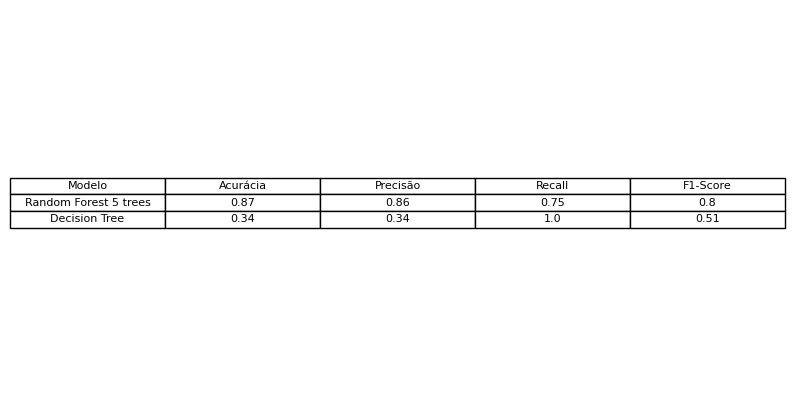

In [17]:
# Compare o desempenho da decision tree com o random forest de 5 árvores. Imprima os resultados em uma tabela e plot a tabela utilizando matplotlib
model_rf = joblib.load('model_rf_5trees_sem_feature.pkl')
y_pred_rf = model_rf.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Decision Tree
model_dt = joblib.load('model_dt_sem_feature.pkl')
y_pred_dt = model_dt.predict(X_test)

# Calcula a acurácia, precisão, recall e f1-score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Cria um DataFrame com os resultados
data = {'Modelo': ['Random Forest 5 trees', 'Decision Tree'],
        'Acurácia': [accuracy_rf, accuracy_dt],
        'Precisão': [precision_rf, precision_dt],
        'Recall': [recall_rf, recall_dt],
        'F1-Score': [f1_rf, f1_dt]}
df = pd.DataFrame(data)

# Imprime o DataFrame
print(df)

# Tabela de metricas
df = df.round(2)
fig, ax = plt.subplots(figsize=(10, 5))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')
plt.savefig('tabela_metricas_rf_dt.png', bbox_inches='tight')
plt.show()




##### Convertendo para código C usando Emlearn

In [15]:
#Carrega o modelo escolhido
model_rf = joblib.load('model_dt_sem_feature.pkl')

In [16]:
import emlearn
cmodel = emlearn.convert(model_rf, method='inline')
cmodel.save(file='decision_tree.h', name='decision_tree')

'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nstatic const EmlTreesNode decision_tree_nodes[965] = {\n  { 1, -59.500000f, 1, 461 },\n  { 2, 166.500000f, 1, 221 },\n  { 1, -344.500000f, 1, 93 },\n  { 0, -610.500000f, 1, 33 },\n  { 5, 48.500000f, 1, 10 },\n  { 4, -664.000000f, 1, 3 },\n  { 2, -965.000000f, 1, -1 },\n  { 1, -933.000000f, -1, -2 },\n  { 2, -56.000000f, 1, 5 },\n  { 3, 3478.000000f, 1, -1 },\n  { 2, -141.500000f, 1, 2 },\n  { 2, -563.000000f, -2, -2 },\n  { 4, 1647.500000f, -2, -1 },\n  { 0, -669.000000f, -1, -2 },\n  { 4, -1023.500000f, 1, 13 },\n  { 0, -636.500000f, 1, 7 },\n  { 2, -1010.500000f, 1, 3 },\n  { 2, -1036.000000f, 1, -2 },\n  { 1, -552.500000f, -1, -2 },\n  { 4, -1061.500000f, 1, 2 },\n  { 0, -735.500000f, -1, -1 },\n  { 4, -1057.000000f, -2, -1 },\n  { 3, -371.000000f, 1, 3 },\n  { 5, 3231.500000f, 1, -1 },\n  { 5, 2464.000000f, -1, -2 },\n  { 4, -1387.500000f, -1, 1 },\n  { 4, -1355.500000f, -2, -1 },\n  {